In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, f1_score
import numpy as np

In [2]:
df = pd.read_csv('/Users/awxlong/Desktop/my-studies/hpc_exps/Data/COAD_g0_arrest_score.csv')

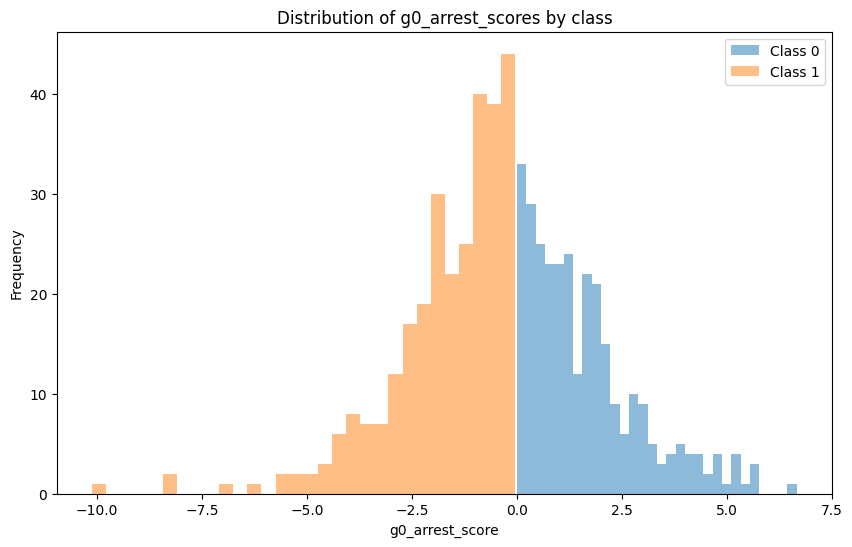

In [3]:
# Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['g0_arrest'] == 0]['g0_arrest_score'], bins=30, alpha=0.5, label='Class 0')
    plt.hist(df[df['g0_arrest'] == 1]['g0_arrest_score'], bins=30, alpha=0.5, label='Class 1')
    plt.legend()
    plt.title('Distribution of g0_arrest_scores by class')
    plt.xlabel('g0_arrest_score')
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
# Open the input .txt file
with open('/Users/awxlong/Desktop/my-studies/hpc_exps/Data/COAD_g0_arrest.txt', 'r') as file:
    # Read the contents of the file
    lines = file.readlines()

# Create a list to store the modified data
data = []

# Iterate through the lines
for line in lines:
    # Split the line by tab
    fields = line.strip().split('\t')
    
    # Modify the "Sample" column
    patient_id = fields[0].replace('-01', '')
    fields[0] = patient_id
    
    # Rename "G0arrest" to "g0_arrest"
    for i, field in enumerate(fields):
        if field == 'Sample':
            fields[i] = "PatientID"
        if field == "G0arrest":
            fields[i] = "g0_arrest"
        if field == 'Score':
            fields[i] = 'g0_arrest_score'
    
    # Add the modified row to the data list
    data.append(fields)

# Open the output .csv file
with open('/Users/awxlong/Desktop/my-studies/hpc_exps/Data/COAD_g0_arrest.csv', 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    
    # Write the header row with "PatientID"
    # writer.writerow(['PatientID'] + [field if field != "Sample" else "g0_arrest" for field in fields[1:]])
    
    # Write the modified data rows
    writer.writerows(data)

print("Conversion complete. Output saved as 'COAD_g0_arrest.csv'.")